# Étape 1 : Importation et fusion des fichiers CSV

Dans cette étape, nous importerons les fichiers CSV contenant les données Airbnb pour différentes périodes et vérifierons qu'ils ont les mêmes colonnes. Ensuite, nous les fusionnerons en un seul DataFrame pour un traitement uniforme.


In [3]:
# Importer les bibliothèques nécessaires
import pandas as pd
import glob

# Spécifiez le dossier contenant les CSV
folder_path = "data"  # À adapter
csv_files = glob.glob(f"{folder_path}/*.csv")

# Charger et fusionner tous les fichiers CSV
dataframes = [pd.read_csv(file) for file in csv_files]

# Vérifier que tous les fichiers ont les mêmes colonnes
for df in dataframes:
    if not dataframes[0].columns.equals(df.columns):
        print("Les colonnes des fichiers ne sont pas identiques")
        break

# Fusionner les fichiers
data = pd.concat(dataframes, ignore_index=True)

# Afficher un aperçu
print(data.head())
print(data.info())


      id                         listing_url       scrape_id last_scraped  \
0   3109   https://www.airbnb.com/rooms/3109  20231212042736   2023-12-12   
1   5396   https://www.airbnb.com/rooms/5396  20231212042736   2023-12-14   
2  81106  https://www.airbnb.com/rooms/81106  20231212042736   2023-12-13   
3   7397   https://www.airbnb.com/rooms/7397  20231212042736   2023-12-13   
4   7964   https://www.airbnb.com/rooms/7964  20231212042736   2023-12-12   

        source                                               name description  \
0  city scrape  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...         NaN   
1  city scrape  Rental unit in Paris · ★4.59 · Studio · 1 bed ...         NaN   
2  city scrape  Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...         NaN   
3  city scrape  Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...         NaN   
4  city scrape  Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...         NaN   

                               neighborhood_overvi

In [4]:
# afficher la forme du dataframe
print(data.shape)
# afficher les colonnes du dataframe
print(data.columns)
# afficher les types de données
print(data.dtypes)

(350072, 75)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_

In [5]:
# afficher les statistiques descriptives
print(data.describe())

                 id     scrape_id       host_id  host_listings_count  \
count  3.500720e+05  3.500720e+05  3.500720e+05        350042.000000   
mean   5.283076e+17  2.023862e+13  1.683900e+08            29.363525   
std    4.858384e+17  3.854267e+09  1.897344e+08           117.397253   
min    3.109000e+03  2.023121e+13  2.750000e+02             0.000000   
25%    2.784216e+07  2.024032e+13  1.825679e+07             1.000000   
50%    6.730709e+17  2.024061e+13  6.571041e+07             1.000000   
75%    9.983991e+17  2.024091e+13  3.135739e+08             3.000000   
max    1.239137e+18  2.024091e+13  5.995743e+08          7397.000000   

       host_total_listings_count  neighbourhood_group_cleansed       latitude  \
count              350042.000000                           0.0  350072.000000   
mean                   37.622134                           NaN      48.864232   
std                   151.658335                           NaN       0.018322   
min                     0.0

# Étape 2 : Prétraitement des données

Dans cette étape, nous :
1. Sélectionnons les colonnes pertinentes.
2. Nettoyons les données pour éliminer les doublons et gérer les valeurs manquantes.
3. Préparons les colonnes catégoriques et textuelles pour la modélisation.


In [6]:
# Sélection des colonnes pertinentes
selected_columns = [
    'neighbourhood_cleansed', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
    'minimum_nights', 'maximum_nights', 'instant_bookable', 
]
data = data[selected_columns]

# Suppression des doublons
data.drop_duplicates(inplace=True)

# Gestion des valeurs manquantes
# Gestion des valeurs manquantes avec la moyenne arrondie
# Remplacer les valeurs manquantes par la moyenne arrondie des colonnes numériques pertinentes
numeric_columns = ['bathrooms', 'bedrooms', 'beds']

for col in numeric_columns:
    mean_value = round(data[col].mean(skipna=True))
    data[col].fillna(mean_value, inplace=True)

# Supprimer les lignes restantes avec des valeurs manquantes dans des colonnes critiques
data.dropna(subset=['neighbourhood_cleansed', 'latitude', 'longitude'], inplace=True)

# Afficher les statistiques descriptives après le remplissage
print(data[numeric_columns].describe())


# Encodage des colonnes catégoriques
data = pd.get_dummies(data, columns=['neighbourhood_cleansed', 'property_type', 'room_type', 'instant_bookable'], drop_first=True)

# Conversion de la colonne amenities en nombre d'équipements (simplification)
data['amenities_count'] = data['amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
data.drop(columns=['amenities'], inplace=True)

# Afficher un aperçu des données nettoyées
print(data.head())
print(data.info())


           bathrooms       bedrooms           beds
count  348615.000000  348615.000000  348615.000000
mean        1.116241       1.250881       1.774490
std         0.433832       0.798557       1.112432
min         0.000000       0.000000       0.000000
25%         1.000000       1.000000       1.000000
50%         1.000000       1.000000       2.000000
75%         1.000000       1.000000       2.000000
max        48.000000      50.000000      90.000000
   latitude  longitude  accommodates  bathrooms  bedrooms  beds    price  \
0  48.83191    2.31870             2        1.0       1.0   1.0  $150.00   
1  48.85247    2.35835             2        1.0       1.0   1.0  $146.00   
2  48.88440    2.36091             2        1.0       1.0   1.0  $110.00   
3  48.85909    2.35315             4        1.0       1.0   2.0  $140.00   
4  48.87417    2.34245             2        1.0       1.0   1.0  $180.00   

   minimum_nights  maximum_nights  neighbourhood_cleansed_Bourse  ...  \
0          

# Étape 3 : Analyse descriptive des données

Dans cette étape, nous analysons les statistiques globales et visualisons les distributions des variables pour valider le nettoyage et identifier des tendances.


            latitude      longitude  accommodates      bathrooms  \
count  348615.000000  348615.000000  348615.00000  348615.000000   
mean       48.864236       2.343230       3.22166       1.116241   
std         0.018321       0.034446       1.66087       0.433832   
min        48.816080       2.224640       1.00000       0.000000   
25%        48.850710       2.320970       2.00000       1.000000   
50%        48.865541       2.346910       3.00000       1.000000   
75%        48.879260       2.368860       4.00000       1.000000   
max        48.901670       2.468360      16.00000      48.000000   

            bedrooms           beds  minimum_nights  maximum_nights  \
count  348615.000000  348615.000000   348615.000000    3.486150e+05   
mean        1.250881       1.774490       45.749319    1.910777e+04   
std         0.798557       1.112432      113.130096    6.299736e+06   
min         0.000000       0.000000        1.000000    1.000000e+00   
25%         1.000000       1.000

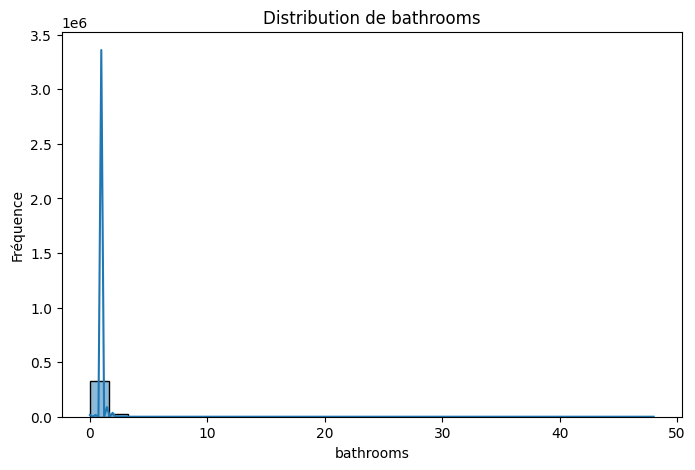

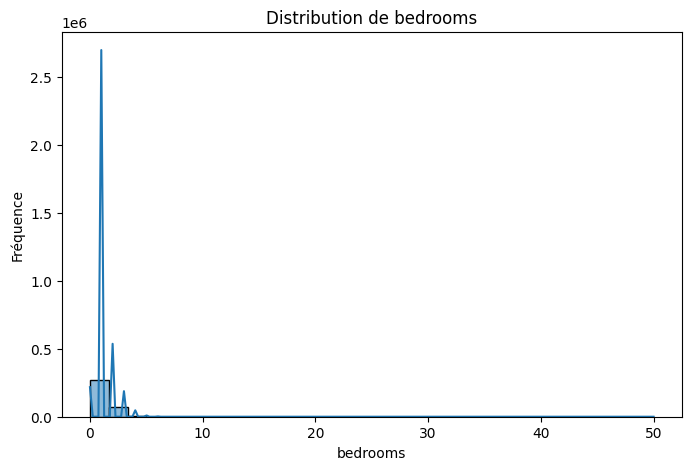

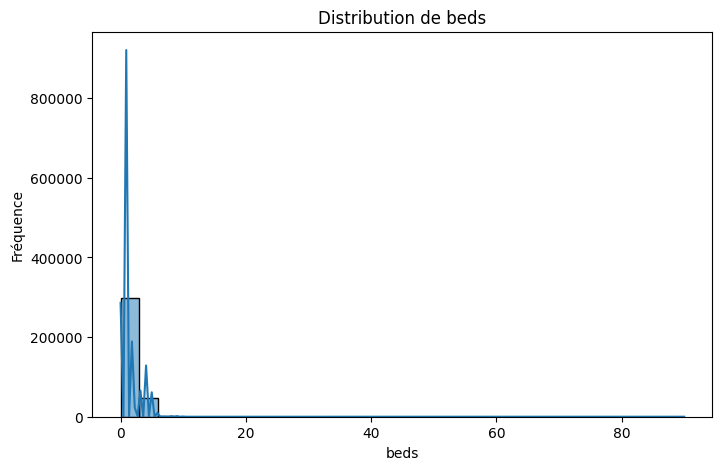

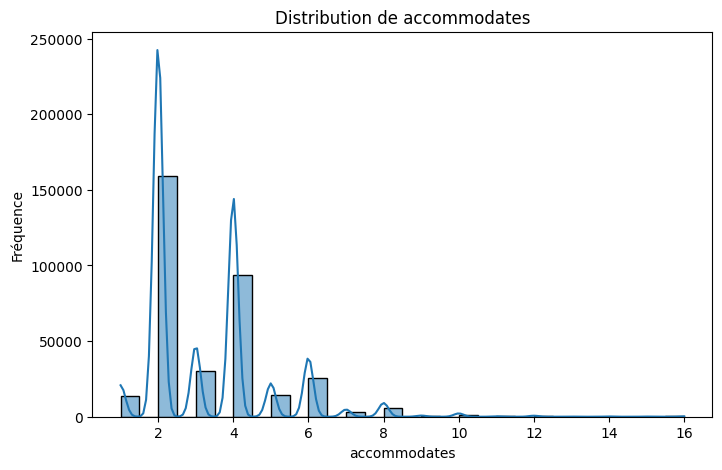

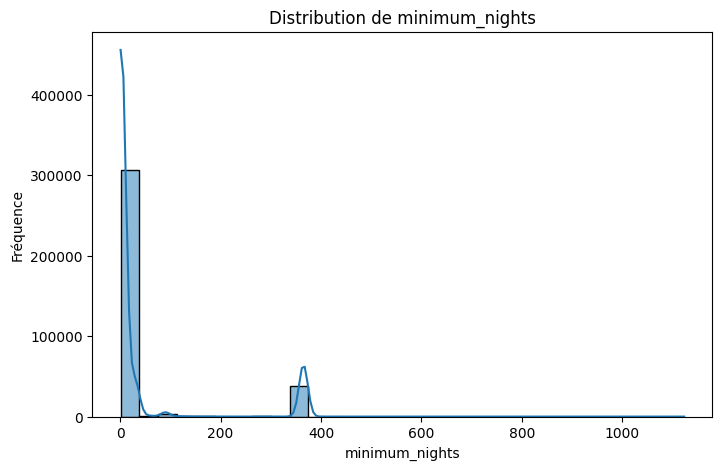

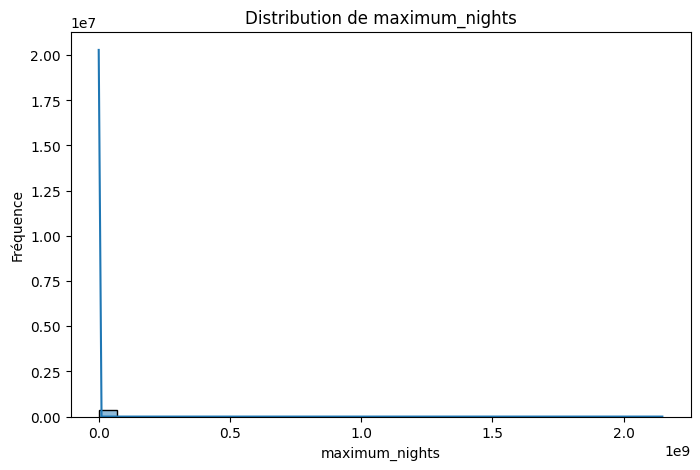

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques descriptives des colonnes numériques
print(data.describe())

# Visualisation des distributions
numeric_columns = ['bathrooms', 'bedrooms', 'beds', 'accommodates', 'minimum_nights', 'maximum_nights']

# Créer des histogrammes pour chaque colonne numérique
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


### Analyse des relations entre les variables
Nous examinons les corrélations entre les variables numériques pour comprendre les relations éventuelles.

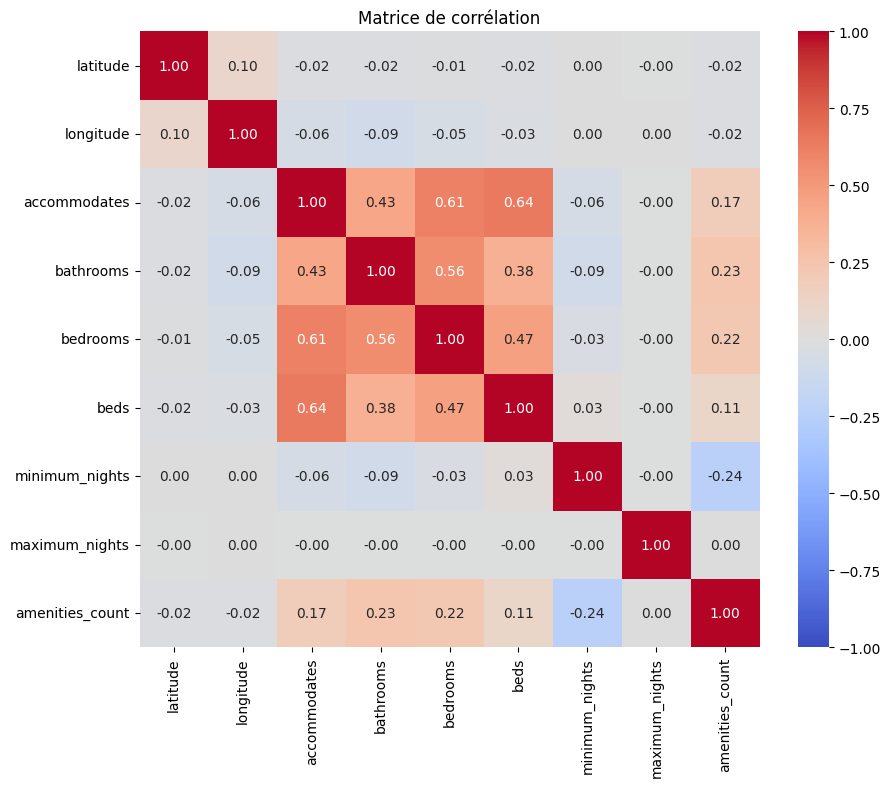

In [8]:
# Réduction des colonnes pour la corrélation
correlation_columns = [
    'latitude', 'longitude', 'accommodates', 'bathrooms', 
    'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 
    'amenities_count'
]

# Calcul de la matrice de corrélation pour les colonnes sélectionnées
correlation_matrix = data[correlation_columns].corr()

# Affichage de la matrice de corrélation avec une taille adaptée
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()


### Analyse des distributions géographiques (latitude et longitude)
Nous visualisons les appartements sur une carte en utilisant un scatter plot pour identifier les clusters géographiques.

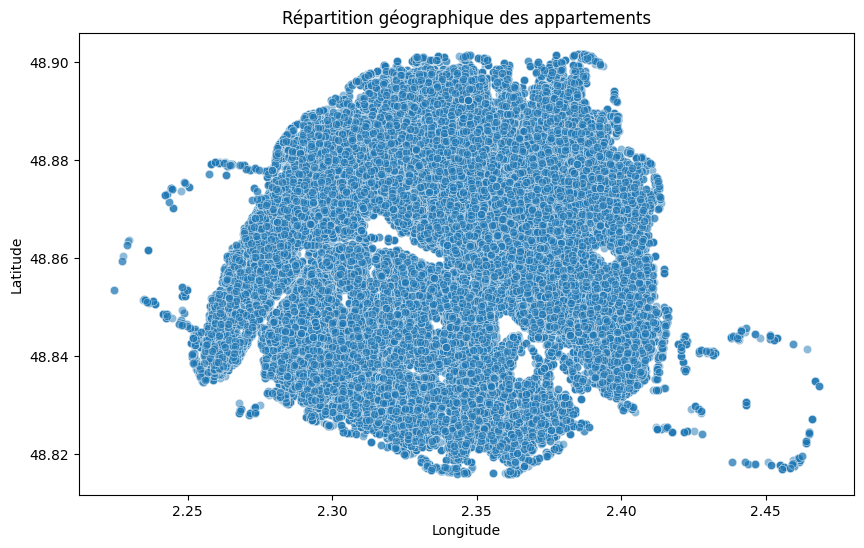

In [9]:
# Scatter plot des emplacements
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=data, alpha=0.5)
plt.title("Répartition géographique des appartements")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Étape 4 : Traitement des valeurs aberrantes

Dans cette étape, nous identifions et supprimons les valeurs aberrantes pour améliorer la qualité des données. 
Nous utiliserons des règles basées sur les quantiles pour les colonnes clés.


In [10]:
# Fixer des seuils pour chaque variable en utilisant les quantiles
outlier_limits = {
    'bathrooms': (data['bathrooms'].quantile(0.01), data['bathrooms'].quantile(0.99)),
    'bedrooms': (data['bedrooms'].quantile(0.01), data['bedrooms'].quantile(0.99)),
    'beds': (data['beds'].quantile(0.01), data['beds'].quantile(0.99)),
    'accommodates': (data['accommodates'].quantile(0.01), data['accommodates'].quantile(0.99)),
    'minimum_nights': (data['minimum_nights'].quantile(0.01), data['minimum_nights'].quantile(0.99)),
    'maximum_nights': (data['maximum_nights'].quantile(0.01), data['maximum_nights'].quantile(0.99)),
}

# Supprimer les lignes en dehors des limites pour chaque colonne
for column, (low, high) in outlier_limits.items():
    data = data[(data[column] >= low) & (data[column] <= high)]

# Afficher les statistiques descriptives après suppression des valeurs aberrantes
print(data.describe())


            latitude      longitude   accommodates      bathrooms  \
count  337910.000000  337910.000000  337910.000000  337910.000000   
mean       48.864259       2.343362       3.137522       1.097550   
std         0.018336       0.034377       1.465265       0.312387   
min        48.816080       2.224640       1.000000       1.000000   
25%        48.850700       2.321231       2.000000       1.000000   
50%        48.865540       2.346960       3.000000       1.000000   
75%        48.879327       2.368998       4.000000       1.000000   
max        48.901670       2.468360       8.000000       3.000000   

           bedrooms           beds  minimum_nights  maximum_nights  \
count  337910.00000  337910.000000   337910.000000   337910.000000   
mean        1.21401       1.715161       46.578645      516.886455   
std         0.66031       0.913207      113.813309      457.710359   
min         0.00000       0.000000        1.000000        5.000000   
25%         1.00000       1.

# Création de nouvelles variables


### Densité des équipements (amenities_density)
La densité des équipements sera définie comme le ratio du nombre d’équipements au nombre de personnes pouvant être logées.

In [11]:
data['amenities_density'] = data['amenities_count'] / data['accommodates']
data['amenities_density'].fillna(0, inplace=True)  


### Cluster géographiques
Nous pouvons regrouper les logements en clusters géographiques en fonction de la latitude et de la longitude.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Déterminer l'inertie pour différents nombres de clusters
inertia = []
silhouette_scores = []
sample_data = data.sample(n=5000, random_state=42)  
K_range = range(2, 15)  # Tester entre 2 et 15 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sample_data[['latitude', 'longitude']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sample_data[['latitude', 'longitude']], kmeans.labels_))
    print('étape' + str(k) )



étape2
étape3
étape4
étape5
étape6
étape7
étape8
étape9
étape10
étape11
étape12
étape13
étape14


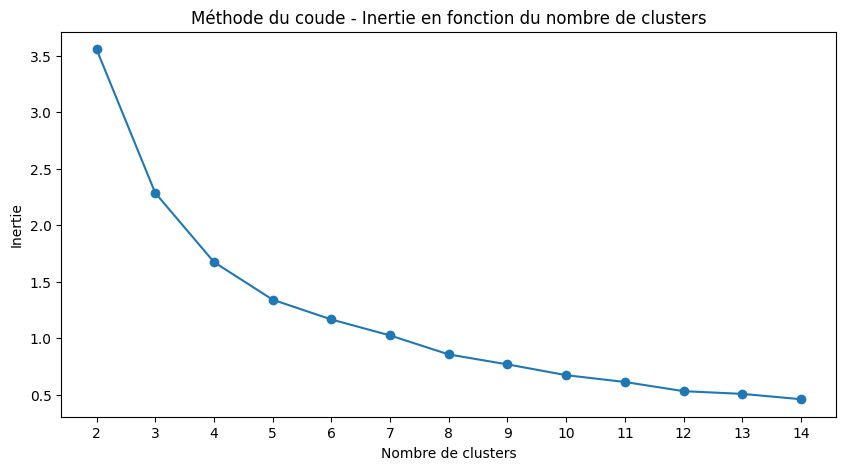

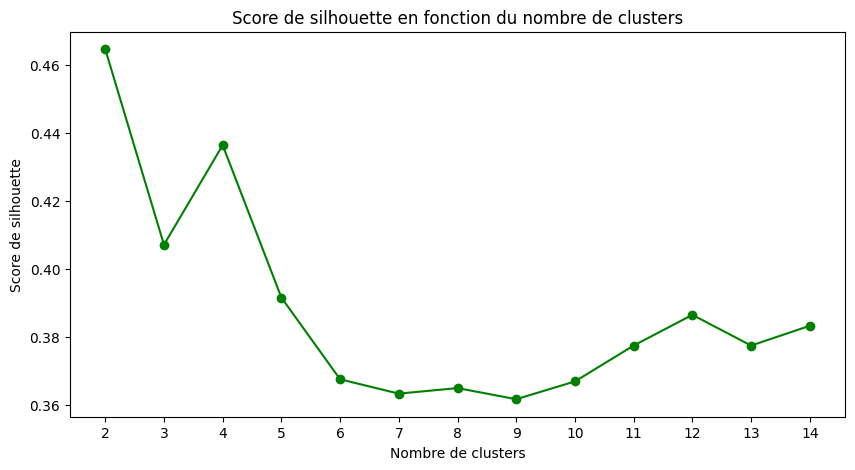

In [13]:
# Visualiser l'inertie (méthode du coude)
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude - Inertie en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.xticks(K_range)
plt.show()

# Visualiser les scores de silhouette
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Score de silhouette en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette")
plt.xticks(K_range)
plt.show()


### Création des clusters géographiques

Nous appliquons KMeans avec le nombre optimal de clusters déterminé précédemment.

In [14]:
# Appliquer KMeans avec le nombre optimal de clusters (remplacer `optimal_k` par la valeur choisie)
optimal_k = 4  # Exemple basé sur l'analyse
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['geo_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# Vérifier la répartition des clusters
print(data['geo_cluster'].value_counts())


geo_cluster
2    111023
0    101510
1     68637
3     56740
Name: count, dtype: int64


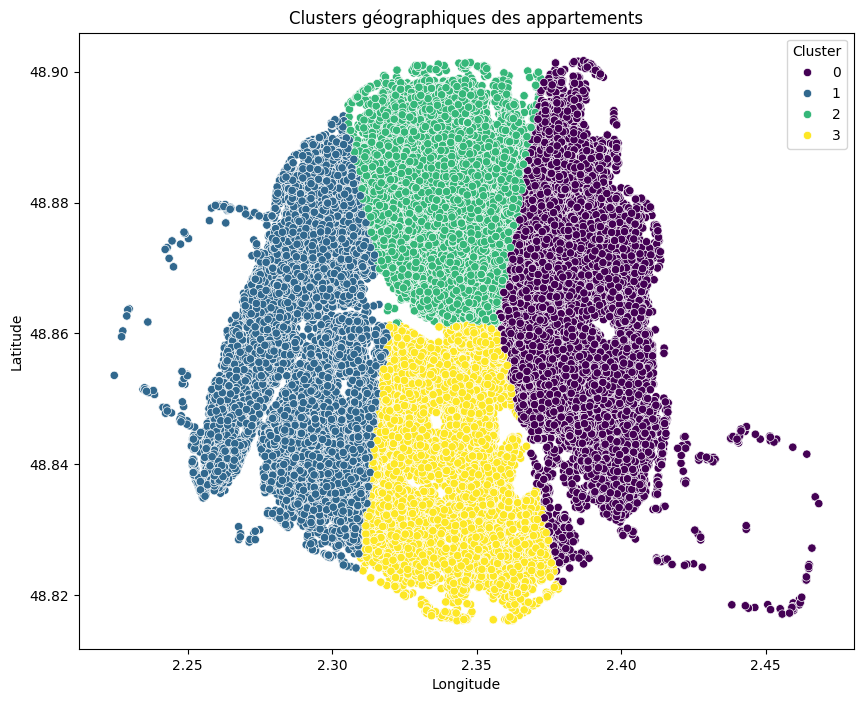

In [15]:
# Visualisation des clusters géographiques
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='geo_cluster', data=data, palette='viridis')
plt.title("Clusters géographiques des appartements")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


# Étape 5 : Préparation et séparation des ensembles pour la modélisation

Nous sélectionnons les colonnes pertinentes pour la prédiction et séparons les données en ensembles d'entraînement et de test.


In [16]:
# Nettoyage de la colonne `price`
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Vérification des premières valeurs après conversion
print(data['price'].head())


0    150.0
1    146.0
2    110.0
3    140.0
4    180.0
Name: price, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Sélection des caractéristiques (features) et de la cible (target)
features = [
    'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 
    'beds', 'minimum_nights', 'maximum_nights', 'geo_cluster'
]
target = 'price'

X = data[features]
y = data[target]

# Séparation des ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données (standardisation des caractéristiques numériques)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversion des cibles en tenseurs
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)


In [18]:
import numpy as np
import pandas as pd

# Vérifier les statistiques des ensembles
print("Statistiques de X_train :")
print(pd.DataFrame(X_train).describe())

print("\nStatistiques de y_train :")
print(pd.DataFrame(y_train).describe())


Statistiques de X_train :
                  0             1             2             3             4  \
count  2.703280e+05  2.703280e+05  2.703280e+05  2.703280e+05  2.703280e+05   
mean   2.710388e-13 -1.056617e-14  1.597307e-16 -1.904047e-16 -8.334804e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.627670e+00 -3.454811e+00 -1.459011e+00 -3.126694e-01 -1.837708e+00   
25%   -7.395184e-01 -6.446632e-01 -7.761230e-01 -3.126694e-01 -3.234783e-01   
50%    6.946972e-02  1.044525e-01 -9.323500e-02 -3.126694e-01 -3.234783e-01   
75%    8.219789e-01  7.448393e-01  5.896530e-01 -3.126694e-01 -3.234783e-01   
max    2.039701e+00  3.638812e+00  3.321205e+00  6.094250e+00  4.219210e+00   

                  5             6             7             8             9  
count  2.703280e+05  2.703280e+05  2.703280e+05  2.703280e+05  2.703280e+05  
mean   5.702415e-17  4.304081e-17  4.783773e-17 -2.090141e-16  6.158451e-17  
std    1.000002e+00  1.00000

In [19]:
# Convertir y_test en un tableau NumPy si nécessaire
y_test_np = y_test.numpy()

# Vérifier la présence de NaN ou d'infini dans X_test et y_test
print("\nPrésence de NaN ou d'infini dans les données de validation :")
print(f"NaN dans X_test : {np.isnan(X_test).sum().sum()}")
print(f"Infini dans X_test : {np.isinf(X_test).sum().sum()}")
print(f"NaN dans y_test : {np.isnan(y_test_np).sum()}")
print(f"Infini dans y_test : {np.isinf(y_test_np).sum()}")


Présence de NaN ou d'infini dans les données de validation :
NaN dans X_test : 0
Infini dans X_test : 0
NaN dans y_test : 16347
Infini dans y_test : 0


In [20]:
# Supprimer les lignes contenant des NaN dans y_test
non_nan_mask = ~np.isnan(y_test.numpy())
X_test = X_test[non_nan_mask]
y_test = y_test[non_nan_mask]


# Suprimer les lignes contenant des Nan dans y_train
non_nan_mask = ~np.isnan(y_train.numpy())
X_train = X_train[non_nan_mask]
y_train = y_train[non_nan_mask]

# Vérification après suppression
print(f"Dimensions après suppression : X_test = {X_test.shape}, y_test = {y_test.shape}")
print(f"Dimensions après suppression : X_train = {X_train.shape}, y_train = {y_train.shape}")


Dimensions après suppression : X_test = (51235, 10), y_test = (51235,)
Dimensions après suppression : X_train = (205624, 10), y_train = (205624,)


In [21]:
# Limiter les prix
price_upper_limit = 5000
y_train = tf.clip_by_value(y_train, 0, price_upper_limit)
y_test = tf.clip_by_value(y_test, 0, price_upper_limit)

# Vérifier les statistiques après clipping
print("Statistiques après clipping :")
print(f"y_train max : {y_train.numpy().max()}, y_test max : {y_test.numpy().max()}")


Statistiques après clipping :
y_train max : 5000.0, y_test max : 5000.0


# Étape 6 : Création du modèle avec TensorFlow

Nous construisons un réseau de neurones basique pour prédire les prix des appartements.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Construction du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Ajout d'un dropout pour éviter l'overfitting
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Une sortie pour prédire le prix
])

# Compilation avec un taux d'apprentissage plus faible
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11777 (46.00 KB)
Trainable params: 11777 (46.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Étape 7 : Entraînement du modèle avec TensorFlow

Nous entraînons le modèle sur l’ensemble d’entraînement et évaluons ses performances

In [25]:
# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


6426/6426 [==============================] - 9s 1ms/step - loss: 109912.9141 - mae: 137.6445 - val_loss: 102258.8594 - val_mae: 129.7588
Epoch 2/50
6426/6426 [==============================] - 8s 1ms/step - loss: 107311.6953 - mae: 134.1992 - val_loss: 101221.1484 - val_mae: 133.1930
Epoch 3/50
6426/6426 [==============================] - 8s 1ms/step - loss: 106276.5547 - mae: 132.8934 - val_loss: 102836.1328 - val_mae: 149.7204
Epoch 4/50
6426/6426 [==============================] - 8s 1ms/step - loss: 105556.3672 - mae: 131.6988 - val_loss: 99041.6172 - val_mae: 127.4112
Epoch 5/50
6426/6426 [==============================] - 8s 1ms/step - loss: 104833.3594 - mae: 130.9213 - val_loss: 98902.0938 - val_mae: 126.2027
Epoch 6/50
6426/6426 [==============================] - 9s 1ms/step - loss: 104500.4766 - mae: 130.5828 - val_loss: 98654.5625 - val_mae: 124.5913
Epoch 7/50
6426/6426 [==============================] - 8s 1ms/step - loss: 104336.0312 - mae: 130.3045 - val_los

# Étape 8 : Évaluation du modèle

Nous évaluons la performance du modèle sur l'ensemble de test en calculant les métriques d'évaluation.


In [26]:
# Évaluer le modèle
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Loss (MSE) sur l'ensemble de test : {test_loss}")
print(f"MAE (Mean Absolute Error) sur l'ensemble de test : {test_mae}")


1602/1602 [==============================] - 1s 722us/step - loss: 92987.2969 - mae: 121.6582
Loss (MSE) sur l'ensemble de test : 92987.296875
MAE (Mean Absolute Error) sur l'ensemble de test : 121.65824890136719


    # Étape 9 : Visualisation des performances

Nous traçons les prédictions contre les valeurs réelles et visualisons la distribution des résidus.


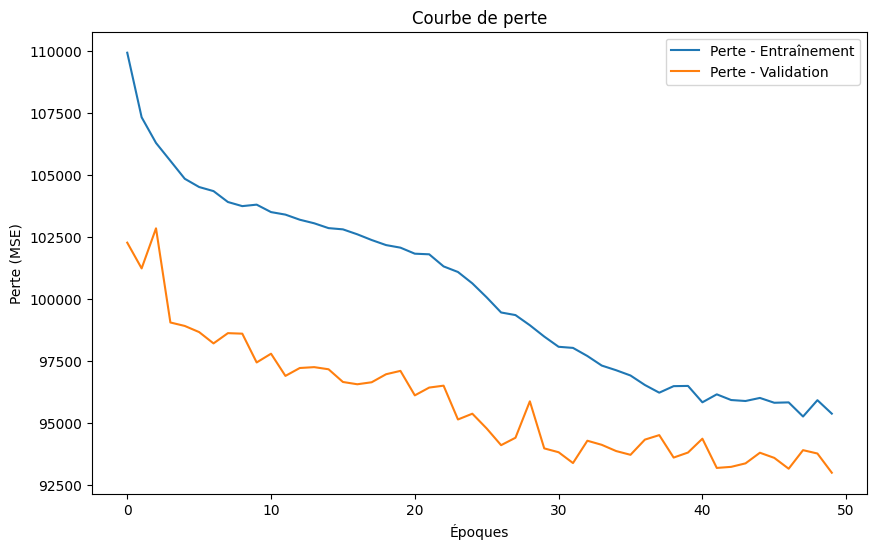

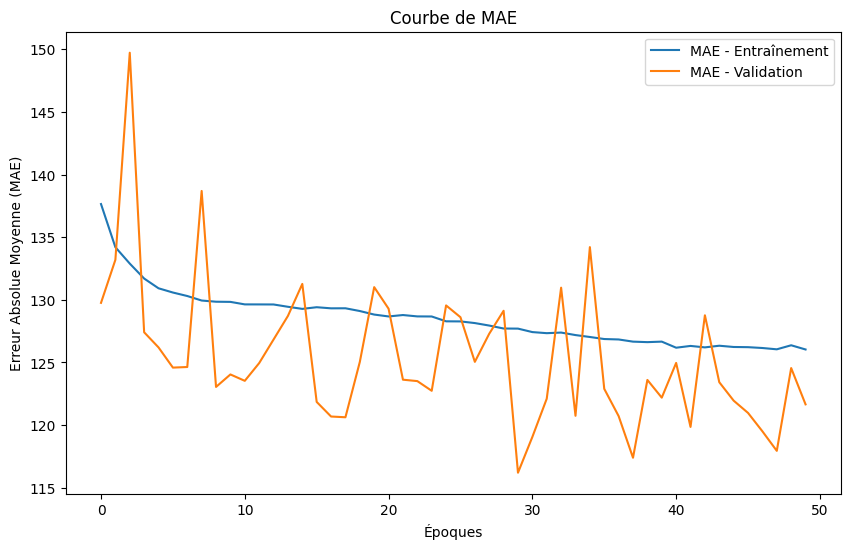

In [27]:
import matplotlib.pyplot as plt

# Tracé de la perte (loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title("Courbe de perte")
plt.xlabel("Époques")
plt.ylabel("Perte (MSE)")
plt.legend()
plt.show()

# Tracé de MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE - Entraînement')
plt.plot(history.history['val_mae'], label='MAE - Validation')
plt.title("Courbe de MAE")
plt.xlabel("Époques")
plt.ylabel("Erreur Absolue Moyenne (MAE)")
plt.legend()
plt.show()


# Amélioration du model 

In [29]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
# Chargement des données
folder_path = "data"  # Adapter au chemin correct
csv_files = glob.glob(f"{folder_path}/*.csv")
dataframes = [pd.read_csv(file) for file in csv_files]
data = pd.concat(dataframes, ignore_index=True)

# Affichage des informations de base
print("Aperçu des données initiales:")
print(data.head())
print(data.info())


Aperçu des données initiales:
      id                         listing_url       scrape_id last_scraped  \
0   3109   https://www.airbnb.com/rooms/3109  20231212042736   2023-12-12   
1   5396   https://www.airbnb.com/rooms/5396  20231212042736   2023-12-14   
2  81106  https://www.airbnb.com/rooms/81106  20231212042736   2023-12-13   
3   7397   https://www.airbnb.com/rooms/7397  20231212042736   2023-12-13   
4   7964   https://www.airbnb.com/rooms/7964  20231212042736   2023-12-12   

        source                                               name description  \
0  city scrape  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...         NaN   
1  city scrape  Rental unit in Paris · ★4.59 · Studio · 1 bed ...         NaN   
2  city scrape  Rental unit in Paris · ★4.84 · 1 bedroom · 1 b...         NaN   
3  city scrape  Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...         NaN   
4  city scrape  Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...         NaN   

                    

In [31]:
# Préparation des données
selected_columns = [
    'neighbourhood_cleansed', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
    'minimum_nights', 'maximum_nights', 'instant_bookable', 
]
data = data[selected_columns]
data

,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,Observatoire,48.831910,2.318700,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$150.00,2,30,f
1,Hôtel-de-Ville,48.852470,2.358350,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$146.00,1,1125,f
2,Entrepôt,48.884400,2.360910,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$110.00,7,15,f
3,Hôtel-de-Ville,48.859090,2.353150,Entire rental unit,Entire home/apt,4,NaN,NaN,2.0,[],$140.00,10,130,f
4,Opéra,48.874170,2.342450,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$180.00,7,365,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350067,Opéra,48.877789,2.341472,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Lockbox"", ""Wif...",$80.00,1,365,t
350068,Passy,48.855590,2.274670,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Fire extinguisher"", ""Kitchen"", ""Wifi"", ""TV"",...",$167.00,1,365,t
350069,Opéra,48.877712,2.337060,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Cooking basics"", ""Smart lock"", ""Long term st...",$98.00,1,22,t
350070,Panthéon,48.853320,2.344220,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$296.00,3,45,t


In [33]:
# Nettoyage des données
# Suppression des doublons
data.drop_duplicates(inplace=True)
data


,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,instant_bookable
0,Observatoire,48.831910,2.318700,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$150.00,2,30,f
1,Hôtel-de-Ville,48.852470,2.358350,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$146.00,1,1125,f
2,Entrepôt,48.884400,2.360910,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$110.00,7,15,f
3,Hôtel-de-Ville,48.859090,2.353150,Entire rental unit,Entire home/apt,4,NaN,NaN,2.0,[],$140.00,10,130,f
4,Opéra,48.874170,2.342450,Entire rental unit,Entire home/apt,2,NaN,NaN,1.0,[],$180.00,7,365,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350067,Opéra,48.877789,2.341472,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Lockbox"", ""Wif...",$80.00,1,365,t
350068,Passy,48.855590,2.274670,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Fire extinguisher"", ""Kitchen"", ""Wifi"", ""TV"",...",$167.00,1,365,t
350069,Opéra,48.877712,2.337060,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Cooking basics"", ""Smart lock"", ""Long term st...",$98.00,1,22,t
350070,Panthéon,48.853320,2.344220,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Cooking basics"", ""Long term stays allowed"", ...",$296.00,3,45,t


In [ ]:
# Gestion des valeurs manquantes avancée
from sklearn.impute import KNNImputer
numeric_columns = ['bathrooms', 'bedrooms', 'beds']
knn_imputer = KNNImputer(n_neighbors=5)
data[numeric_columns] = knn_imputer.fit_transform(data[numeric_columns])

# Suppression des lignes critiques avec des valeurs manquantes
critical_columns = ['neighbourhood_cleansed', 'latitude', 'longitude']
data.dropna(subset=critical_columns, inplace=True)

In [ ]:
data

In [ ]:
# Traitement des valeurs aberrantes
price_q1, price_q3 = np.percentile(data['price'], [25, 75])
iqr = price_q3 - price_q1
lower_bound = price_q1 - 1.5 * iqr
upper_bound = price_q3 + 1.5 * iqr
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

In [ ]:
# Encodage et transformation des caractéristiques
categorical_columns = ['neighbourhood_cleansed', 'property_type', 'room_type', 'instant_bookable']
num_features = ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)


In [ ]:
# Séparation des données
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])


In [ ]:
# Optimisation des hyperparamètres
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
# Évaluation du modèle
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Meilleur Modèle:", grid_search.best_params_)
print("MAE:", mae)
print("RMSE:", rmse)

In [ ]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Comparaison entre valeurs réelles et prédites')
plt.show()

# Écriture des résultats optimisés dans un fichier CSV
final_results = pd.DataFrame({'Valeurs Réelles': y_test, 'Prédictions': y_pred})
final_results.to_csv('resultats_predictions.csv', index=False)
